In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('placementpkg.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
df.shape


(200, 2)

Text(0, 0.5, 'pakage')

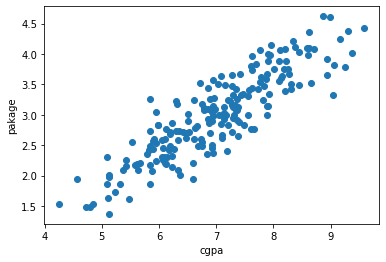

In [5]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('cgpa')
plt.ylabel('pakage')

In [53]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

In [54]:
y.shape

(200,)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
lr=LinearRegression()

In [59]:
lr.fit(x_train,y_train)

LinearRegression()

InvalidIndexError: (slice(None, None, None), None)

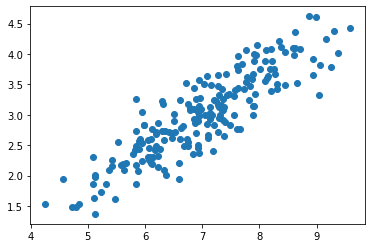

In [64]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [65]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [66]:
y_predict=lr.predict(x_test)

In [69]:
y_predict

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [71]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [72]:
print('MAE',mean_absolute_error(y_test,y_predict))

MAE 0.2884710931878175


In [73]:
print('MsE',mean_squared_error(y_test,y_predict))

MsE 0.12129235313495527


In [74]:
print('RMsE',np.sqrt(mean_squared_error(y_test,y_predict)))

RMsE 0.34827051717731616


In [75]:
#r2_score
print('r2_score',r2_score(y_test,y_predict))

r2_score 0.780730147510384


In [76]:
#adjusted r2_score
x_test.shape

(40, 1)

In [77]:
r2=r2_score(y_test,y_predict)

In [78]:
1-((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

In [79]:
#adding new feature
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.772792,3.26
1,5.12,0.634347,1.98
2,7.82,0.759146,3.25
3,7.42,0.805072,3.67
4,6.94,0.521404,3.57


Text(0, 0.5, 'Package(in lpa)')

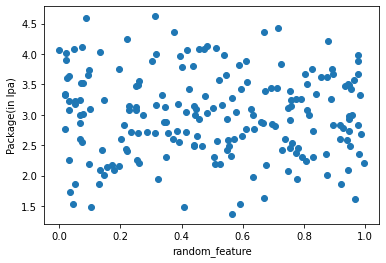

In [80]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [81]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [82]:
X

,cgpa,random_feature
0,6.89,0.772792
1,5.12,0.634347
2,7.82,0.759146
3,7.42,0.805072
4,6.94,0.521404
...,...,...
195,6.93,0.753097
196,5.89,0.515465
197,7.21,0.067502
198,7.63,0.393786


In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [84]:
lr = LinearRegression()

In [85]:
lr.fit(X_train,y_train)

LinearRegression()

In [86]:
y_pred = lr.predict(X_test)

In [87]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7790085127151234


In [88]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7670630269159409

In [89]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [90]:
new_df2.sample(5)

,cgpa,iq,package
88,4.73,0.78,1.48
32,6.96,3.98,3.08
126,5.91,1.60,2.60
115,8.35,4.61,4.21
185,6.31,3.38,3.18


Text(0, 0.5, 'Package(in lpa)')

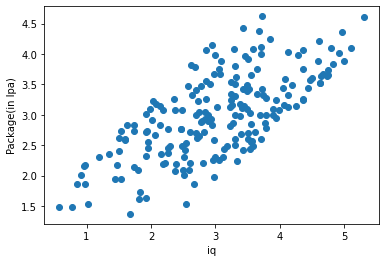

In [91]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [92]:
np.random.randint(-100,100)

-93

In [93]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [94]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [95]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [96]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8396705414458832


In [97]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8310040842267417